In [406]:
import pandas as pd
import networkx as nx
import os
import seaborn

In [407]:
#Path
Barcelona = "../Data/FCBarcelona/ThirdStage/TargetFiles/11_1_1_0_footballDayPasses.csv"

In [408]:
try:
    # Read the CSV files into DataFrames
    metadataBarcelona = pd.read_csv(Barcelona, sep=",")
    #metadataArsenal = pd.read_csv(Arsenal, sep=",")
    # Now metadataManUnited and metadataManCity contain the data from the CSV files
except FileNotFoundError:
    print("One of the files does not exist or the path is incorrect.")
except Exception as e:
    print("An error occurred:", str(e))


In [409]:
# Initialize a directed graph using NetworkX
G = nx.MultiDiGraph()

In [410]:
# Remove NaN values from the 'player_id' column
validPlayerIds = metadataBarcelona['player_id'].dropna().unique()

# Add nodes to the graph
G.add_nodes_from(validPlayerIds)

In [411]:
allNodes = list(G.nodes())

# Print all the nodes at once
print("All nodes in the graph:", allNodes)

All nodes in the graph: [4324.0, 5470.0, 5213.0, 5506.0, 5211.0, 4320.0, 5216.0, 5203.0, 5503.0, 4691.0, 5246.0]


In [422]:
uniquePlayers = metadataBarcelona[['player_id', 'player_name']].drop_duplicates().dropna()

# Create a dictionary mapping player IDs to their names
playerNameDict = dict(zip(uniquePlayers['player_id'], uniquePlayers['player_name']))

# Set node attributes for names
nx.set_node_attributes(G, playerNameDict, name='label')

TypeError: 'method' object is not subscriptable

In [413]:
# Get all node attributes
nodeAttributes = nx.get_node_attributes(G, 'label')

# Print all node attributes at once
print("Node attributes:", nodeAttributes)


Node attributes: {4324.0: 'Daniel Alves da Silva', 5470.0: 'Ivan Rakitić', 5213.0: 'Gerard Piqué Bernabéu', 5506.0: 'Javier Alejandro Mascherano', 5211.0: 'Jordi Alba Ramos', 4320.0: 'Neymar da Silva Santos Junior', 5216.0: 'Andrés Iniesta Luján', 5203.0: 'Sergio Busquets i Burgos', 5503.0: 'Lionel Andrés Messi Cuccittini', 4691.0: 'Claudio Andrés Bravo Muñoz', 5246.0: 'Luis Alberto Suárez Díaz'}


EDGES

In [414]:
def add_edges_with_attributes(row):
    # Extract relevant information
    playerId = row['player_id']
    passRecipientId = row['pass_recipient_id']
    attributes = {
        'possession': float(row['possession']),
        'location_0': float(row['location_0']),
        'location_1': float(row['location_1']),
        'pass_length': float(row['pass_length']),
        'pass_height_id': float(row['pass_height_id']),
        'pass_end_location_0': float(row['pass_end_location_0']),
        'pass_end_location_1': float(row['pass_end_location_1']),
        'pass_outcome_name': str(row['pass_outcome_name'])
    }
    
    # Add edge with attributes to the graph
    G.add_edge(playerId, passRecipientId, **attributes)


In [415]:
# Apply the function to each row of the DataFrame
_ = metadataBarcelona.apply(add_edges_with_attributes, axis=1)

In [416]:
#G.add_edges_from(metadataBarcelona[['player_id', 'pass_recipient_id']].values.tolist())

In [417]:
print("All nodes in the graph:", list(G.edges(data = True)))
print(len(list(G.edges())))

All nodes in the graph: [(4324.0, 5470.0, {'possession': 3.0, 'location_0': 11.1, 'location_1': 54.8, 'pass_length': 11.014536, 'pass_height_id': 3.0, 'pass_end_location_0': 20.7, 'pass_end_location_1': 49.4, 'pass_outcome_name': 'nan'}), (4324.0, 5470.0, {'possession': 16.0, 'location_0': 93.3, 'location_1': 76.9, 'pass_length': 19.423954, 'pass_height_id': 1.0, 'pass_end_location_0': 75.6, 'pass_end_location_1': 68.9, 'pass_outcome_name': 'nan'}), (4324.0, 5470.0, {'possession': 19.0, 'location_0': 86.5, 'location_1': 65.7, 'pass_length': 18.47187, 'pass_height_id': 1.0, 'pass_end_location_0': 100.1, 'pass_end_location_1': 78.2, 'pass_outcome_name': 'nan'}), (4324.0, 5503.0, {'possession': 6.0, 'location_0': 72.7, 'location_1': 67.3, 'pass_length': 16.420109, 'pass_height_id': 1.0, 'pass_end_location_0': 85.8, 'pass_end_location_1': 77.2, 'pass_outcome_name': 'nan'}), (4324.0, 5503.0, {'possession': 16.0, 'location_0': 68.3, 'location_1': 64.2, 'pass_length': 21.46835, 'pass_height_i

In [418]:
# Get the current working directory
currentDirectory = os.getcwd()

# Specify the output file name
outputFileName = 'asasa.graphml'

# Combine the directory path and file name
outputFilePath = os.path.join(currentDirectory, outputFileName)

# Write the graph to the GraphML file
nx.write_gexf(G, outputFilePath, version="1.2draft", encoding="utf-8", prettyprint=True)


In [419]:
# Assuming you have a multidigraph named G
# Calculate the inDegree and outDegree for each node
inDegree = dict(G.in_degree())
outDegree = dict(G.out_degree())

# Print the inDegree, outDegree, and count for each node
print("Node Degrees:")
for node in G.nodes():
    in_degree = inDegree.get(node, 0)
    out_degree = outDegree.get(node, 0)
    total_degree = in_degree + out_degree
    print(f"Node {node}: InDegree = {in_degree}, OutDegree = {out_degree}, TotalDegree = {total_degree}")


Node Degrees:
Node 4324.0: InDegree = 14, OutDegree = 14, TotalDegree = 28
Node 5470.0: InDegree = 7, OutDegree = 11, TotalDegree = 18
Node 5213.0: InDegree = 8, OutDegree = 9, TotalDegree = 17
Node 5506.0: InDegree = 17, OutDegree = 19, TotalDegree = 36
Node 5211.0: InDegree = 12, OutDegree = 16, TotalDegree = 28
Node 4320.0: InDegree = 15, OutDegree = 10, TotalDegree = 25
Node 5216.0: InDegree = 12, OutDegree = 11, TotalDegree = 23
Node 5203.0: InDegree = 11, OutDegree = 13, TotalDegree = 24
Node 5503.0: InDegree = 13, OutDegree = 11, TotalDegree = 24
Node 4691.0: InDegree = 2, OutDegree = 3, TotalDegree = 5
Node 5246.0: InDegree = 8, OutDegree = 4, TotalDegree = 12
Node nan: InDegree = 1, OutDegree = 0, TotalDegree = 1
Node nan: InDegree = 1, OutDegree = 0, TotalDegree = 1


In [420]:
# Assuming you have already calculated inDegree using in_degree() method
inDegree = dict(G.in_degree())

# Convert dictionary to DataFrame
inDegree_df = pd.DataFrame.from_dict(inDegree, orient='index', columns=['InDegree'])

# Reset index to make 'Node' a regular column
inDegree_df.reset_index(inplace=True)
inDegree_df.rename(columns={'index': 'Node'}, inplace=True)

# Remove rows with NaN values
inDegree_df = inDegree_df.dropna()

# Display the DataFrame
print(inDegree_df)


      Node  InDegree
0   4324.0        14
1   5470.0         7
2   5213.0         8
3   5506.0        17
4   5211.0        12
5   4320.0        15
6   5216.0        12
7   5203.0        11
8   5503.0        13
9   4691.0         2
10  5246.0         8


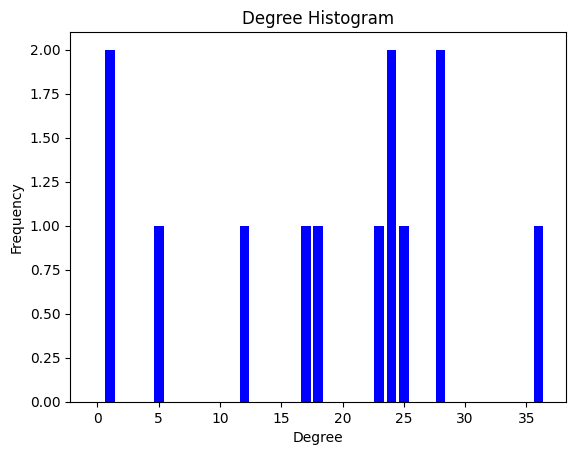

In [421]:
hist = nx.degree_histogram(G)

# Plot the histogram
plt.bar(range(len(hist)), hist, width=0.80, color='b')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Histogram')
plt.show()
